In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from iterativefg import utils

Using lenspyx alm2map


In [2]:
lmin, lmax, deltal = 5, 4000, 60
bin_edges = np.arange(lmin, lmax, deltal)
bin = lambda cl: utils.bin_theory(cl, bin_edges)

In [44]:
directory_results = pathlib.Path("/scratch/snx3000/odarwish/joint_map_outputs")


version = "phi_omega_alpha_joint"
version_2 = "phi_omega_joint"
cmb_version = "phi_alpha"
imin = 0
imax = 127
itmax = 10

qe_key = "p_p"

itr = 10

def get_results(version, cmb_version, imin, imax, itmax, qe_key, ncomponents = 3):
    #TODO: WRITE A GENERAL VERSION

    filenames = f"{version}_{cmb_version}_{imin}_{imax}_{itmax}.npy"
    print(filenames)

    inputs = np.load(directory_results / f"input_{filenames}")
    qe = np.load(directory_results / f"total_qe_{qe_key}_{filenames}")
    qe_cross = np.load(directory_results / f"total_qe_cross_{qe_key}_{filenames}")

    it = np.load(directory_results / f"total_qe_it_{qe_key}_{filenames}")
    it_cross = np.load(directory_results / f"total_qe_it_cross_{qe_key}_{filenames}")

    it_results_mean = np.mean(it[1:, ...], axis=0)
    it_results_std = np.std(it[1:, ...], axis=0)

    it_results_mean_cross = np.mean(it_cross[1:, ...], axis=0)
    it_results_std_cross = np.std(it_cross[1:, ...], axis=0)

    qe_results_mean = np.mean(qe[1:, ...], axis=0)
    qe_results_std = np.std(qe[1:, ...], axis=0)

    qe_results_mean_cross = np.mean(qe_cross[1:, ...], axis=0)
    qe_results_std_cross = np.std(qe_cross[1:, ...], axis=0)

    inputs_mean = np.mean(inputs[1:, ...], axis=0)

    alpha, phi, omega = np.split(inputs_mean, ncomponents)

    alpha_qe, phi_qe, omega_qe = np.split(qe_results_mean, ncomponents)
    alpha_qe_cross, phi_qe_cross, omega_qe_cross = np.split(qe_results_mean_cross, ncomponents)

    alpha_it, phi_it, omega_it = np.split(it_results_mean[itr], ncomponents)
    alpha_it_cross, phi_it_cross, omega_it_cross = np.split(it_results_mean_cross[itr], ncomponents)

    WF = -alpha_it_cross/alpha
    WF_phi = -phi_it_cross/phi
    WF_omega = -omega_it_cross/omega

    alpha_it_single, phi_it_single, omega_it_single = np.split(it[0, itr, :], ncomponents)
    alpha_it_cross_single, phi_it_cross_single, omega_it_cross_single = np.split(it_cross[0, itr, :], ncomponents)
    alpha_single, phi_single, omega_single = np.split(inputs[0, :], ncomponents)

    alpha_qe_single, phi_qe_single, omega_qe_single = np.split(qe[0, :], ncomponents)
    alpha_qe_cross_single, phi_qe_cross_single, omega_qe_cross_single = np.split(qe_cross[0, :], ncomponents)


    alpha_results = alpha, alpha_qe, alpha_qe_cross, alpha_it, alpha_it_cross, WF, alpha_single, alpha_qe_single, alpha_qe_cross_single, alpha_it_single, alpha_it_cross_single

    phi_results = phi, phi_qe, phi_qe_cross, phi_it, phi_it_cross, WF_phi, phi_single, phi_qe_single, phi_qe_cross_single, phi_it_single, phi_it_cross_single

    omega_results = omega, omega_qe, omega_qe_cross, omega_it, omega_it_cross, WF_omega, omega_single, omega_qe_single, omega_qe_cross_single, omega_it_single, omega_it_cross_single

    return alpha_results, phi_results, omega_results


def get_results_2(version, cmb_version, imin, imax, itmax, qe_key, ncomponents = 2):
    filenames = f"{version}_{cmb_version}_{imin}_{imax}_{itmax}.npy"
    print(filenames)

    inputs = np.load(directory_results / f"input_{filenames}")
    qe = np.load(directory_results / f"total_qe_{qe_key}_{filenames}")

    qe_cross = np.load(directory_results / f"total_qe_cross_{qe_key}_{filenames}")

    it = np.load(directory_results / f"total_qe_it_{qe_key}_{filenames}")
    it_cross = np.load(directory_results / f"total_qe_it_cross_{qe_key}_{filenames}")

    it_results_mean = np.mean(it[1:, ...], axis=0)
    it_results_std = np.std(it[1:, ...], axis=0)

    it_results_mean_cross = np.mean(it_cross[1:, ...], axis=0)
    it_results_std_cross = np.std(it_cross[1:, ...], axis=0)

    qe_results_mean = np.mean(qe[1:, ...], axis=0)
    qe_results_std = np.std(qe[1:, ...], axis=0)

    qe_results_mean_cross = np.mean(qe_cross[1:, ...], axis=0)
    qe_results_std_cross = np.std(qe_cross[1:, ...], axis=0)

    inputs_mean = np.mean(inputs[1:, ...], axis=0)

    phi, omega = np.split(inputs_mean, ncomponents)

    phi_qe, omega_qe = np.split(qe_results_mean, ncomponents)
    phi_qe_cross, omega_qe_cross = np.split(qe_results_mean_cross, ncomponents)

    phi_it, omega_it = np.split(it_results_mean[itr], ncomponents)
    phi_it_cross, omega_it_cross = np.split(it_results_mean_cross[itr], ncomponents)

    WF_phi = -phi_it_cross/phi
    WF_omega = -omega_it_cross/omega

    phi_it_single, omega_it_single = np.split(it[0, itr, :], ncomponents)
    phi_it_cross_single, omega_it_cross_single = np.split(it_cross[0, itr, :], ncomponents)
    phi_single, omega_single = np.split(inputs[0, :], ncomponents)

    phi_qe_single, omega_qe_single = np.split(qe[0, :], ncomponents)
    phi_qe_cross_single, omega_qe_cross_single = np.split(qe_cross[0, :], ncomponents)

    phi_results = phi, phi_qe, phi_qe_cross, phi_it, phi_it_cross, WF_phi, phi_single, phi_qe_single, phi_qe_cross_single, phi_it_single, phi_it_cross_single

    omega_results = omega, omega_qe, omega_qe_cross, omega_it, omega_it_cross, WF_omega, omega_single, omega_qe_single, omega_qe_cross_single, omega_it_single, omega_it_cross_single

    return phi_results, omega_results

In [45]:
alpha_results, phi_results, _ = get_results(version, cmb_version, imin, imax, itmax, qe_key)
alpha, alpha_qe, alpha_qe_cross, alpha_it, alpha_it_cross, WF, alpha_single, alpha_qe_single, alpha_qe_cross_single, alpha_it_single, alpha_it_cross_single = alpha_results
phi, phi_qe, phi_qe_cross, phi_it, phi_it_cross, WF_phi, phi_single, phi_qe_single, phi_qe_cross_single, phi_it_single, phi_it_cross_single = phi_results


alpha_results_randomized, phi_results_randomized, _ = get_results(version+"_randomized", cmb_version, imin, imax, itmax, qe_key)
alpha_randomized, alpha_qe_randomized, alpha_qe_cross_randomized, alpha_it_randomized, alpha_it_cross_randomized, WF_randomized, alpha_single_randomized, alpha_qe_single_randomized, alpha_qe_cross_single_randomized, alpha_it_single_randomized, alpha_it_cross_single_randomized = alpha_results_randomized
phi, phi_qe_randomized, phi_qe_cross_randomized, phi_it_randomized, phi_it_cross_randomized, WF_phi_randomized, phi_single_randomized, phi_qe_single_randomized, phi_qe_cross_single_randomized, phi_it_single_randomized, phi_it_cross_single_randomized = phi_results_randomized

phi_omega_alpha_joint_phi_alpha_0_127_10.npy


/tmp/ipykernel_30088/3364591571.py:50: RuntimeWarning: invalid value encountered in divide
  WF = -alpha_it_cross/alpha
/tmp/ipykernel_30088/3364591571.py:51: RuntimeWarning: invalid value encountered in divide
  WF_phi = -phi_it_cross/phi
/tmp/ipykernel_30088/3364591571.py:52: RuntimeWarning: invalid value encountered in divide
  WF_omega = -omega_it_cross/omega


phi_omega_alpha_joint_randomized_phi_alpha_0_127_10.npy


In [46]:
phi_results_2, _ = get_results_2(version_2, cmb_version, imin, imax, itmax, qe_key)
phi_results_randomized_2, _ = get_results_2(version_2+"_randomized", cmb_version, imin, imax, itmax, qe_key)

phi_2, phi_qe_2, phi_qe_cross_2, phi_it_2, phi_it_cross_2, WF_phi_2, phi_single_2, phi_qe_single_2, phi_qe_cross_single_2, phi_it_single_2, phi_it_cross_single_2 = phi_results_2
phi_2, phi_qe_randomized_2, phi_qe_cross_randomized_2, phi_it_randomized_2, phi_it_cross_randomized_2, WF_phi_randomized_2, phi_single_randomized_2, phi_qe_single_randomized_2, phi_qe_cross_single_randomized_2, phi_it_single_randomized_2, phi_it_cross_single_randomized_2 = phi_results_randomized_2

phi_omega_joint_phi_alpha_0_127_10.npy


/tmp/ipykernel_30088/3364591571.py:105: RuntimeWarning: invalid value encountered in divide
  WF_phi = -phi_it_cross/phi
/tmp/ipykernel_30088/3364591571.py:106: RuntimeWarning: invalid value encountered in divide
  WF_omega = -omega_it_cross/omega


phi_omega_joint_randomized_phi_alpha_0_127_10.npy


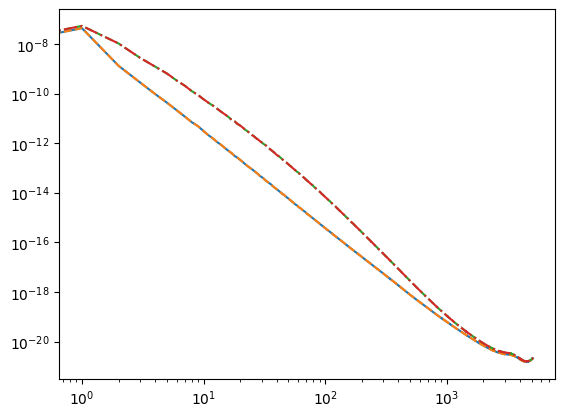

In [49]:
plt.loglog(phi_qe_randomized_2)
plt.loglog(phi_qe_randomized, ls = "--")

plt.loglog(phi_qe, ls = "--")
plt.loglog(phi_qe_2, ls = "-.")

In [50]:
def camb_clfile_gradient(fname, lmax=None):
    """CAMB spectra (lenspotentialCls, lensedCls or tensCls types) returned as a dict of numpy arrays.
    Args:
        fname (str): path to CAMB output file
        lmax (int, optional): outputs cls truncated at this multipole.
    """
    cols = np.loadtxt(fname).transpose()
    ell = np.int_(cols[0])
    if lmax is None: lmax = ell[-1]
    assert ell[-1] >= lmax, (ell[-1], lmax)
    cls = {k : np.zeros(lmax + 1, dtype=float) for k in ['tt', 'ee', 'bb', 'te']}
    w = ell * (ell + 1) / (2. * np.pi)  # weights in output file
    idc = np.where(ell <= lmax) if lmax is not None else np.arange(len(ell), dtype=int)
    for i, k in enumerate(['tt', 'ee', 'bb', 'te']):
        cls[k][ell[idc]] = cols[i + 1][idc] / w[idc]
    return cls

In [6]:
from os.path import join as opj
import os
from plancklens import n0s, utils

cls_path = opj(os.environ['HOME'], 'fgcmblensing', 'input', 'giulio')
#cls_path = opj("/Users/omard/Downloads/", 'giulio')
cls_unl = utils.camb_clfile(opj(cls_path, 'lensedCMB_dmn1_lenspotentialCls.dat'))
cls_len = utils.camb_clfile(opj(cls_path, 'lensedCMB_dmn1_lensedCls.dat'))
cls_grad = camb_clfile_gradient(opj(cls_path, 'lensedCMB_dmn1_lensedgradCls.dat'))


ksource = "p"
beam_fwhm = 1.0
nlev_t = 1.0
nlev_p = nlev_t*np.sqrt(2)
lmax_cmb = 4000
lmin_cmb = 30
lmax_qlm = 5120

result = n0s.get_N0(beam_fwhm=beam_fwhm, nlev_t = nlev_t, nlev_p = nlev_p, lmax_CMB = lmax_cmb,
           lmin_CMB = lmin_cmb, lmax_out = lmax_qlm, ksource = ksource, cls_filt = cls_len, cls_len=cls_grad)

In [9]:
qe_key = "p_p"
itermax = 5
result_iter = n0s.get_N0_iter(qe_key = qe_key, nlev_t = nlev_t, nlev_p = nlev_p, beam_fwhm = beam_fwhm,
                cls_unl_fid = cls_unl, lmin_cmb = lmin_cmb, lmax_cmb = lmax_cmb, itermax = itermax, lmax_qlm = lmax_qlm, ksource = ksource)

 [00:04:50]  --------> 83%


In [13]:
from delensalot.biases import n0n1_iterative

In [14]:
full_result_iter = n0n1_iterative.get_biases_iter(qe_key, nlev_t, nlev_p, beam_fwhm, cls_unl, lmin_cmb, lmax_cmb, itermax, lmax_qlm=lmax_qlm, version = "wN1")

Adding n1 in iterations
 [00:05:29]  --------> 83%


In [49]:
N0sphi = result[0]
N0, N1 = full_result_iter[0], full_result_iter[2]

In [12]:
phi_qe_single_2/phi_qe_single

/tmp/ipykernel_30088/1304926423.py:1: RuntimeWarning: invalid value encountered in divide
  phi_qe_single_2/phi_qe_single


array([nan,  1.,  1., ...,  1.,  1.,  1.])

/tmp/ipykernel_30088/3971444467.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.loglog((phi_qe_single-phi_qe_single_randomized)/phi[0]/WF_phi[0]**2, label = "Difference Single")
/tmp/ipykernel_30088/3971444467.py:9: RuntimeWarning: invalid value encountered in divide
  plt.loglog((phi_qe_single-phi_qe_single_randomized)/phi[0]/WF_phi[0]**2, label = "Difference Single")
/tmp/ipykernel_30088/3971444467.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.loglog((phi_qe_single_2-phi_qe_single_randomized_2)/phi[0]/WF_phi_2[0]**2, label = "Difference Single 2", ls = "--")
/tmp/ipykernel_30088/3971444467.py:10: RuntimeWarning: invalid value encountered in divide
  plt.loglog((phi_qe_single_2-phi_qe_single_randomized_2)/phi[0]/WF_phi_2[0]**2, label = "Difference Single 2", ls = "--")


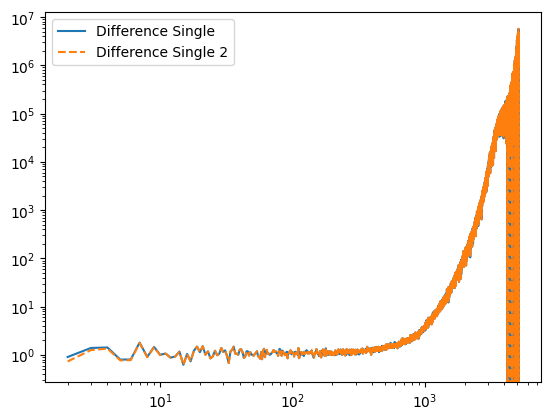

In [51]:
#plt.loglog(phi_qe_randomized, label = "Randomized")
#plt.plot(abs(N0[0]), lw = 2)
#plt.plot(abs(N0sphi["p_p"]), lw = 2, ls = "--")


#plt.loglog(phi_qe, label = "Original")

#plt.loglog(phi_qe-phi_qe_randomized-phi[0], label = "Difference")
plt.loglog((phi_qe_single-phi_qe_single_randomized)/phi[0]/WF_phi[0]**2, label = "Difference Single")
plt.loglog((phi_qe_single_2-phi_qe_single_randomized_2)/phi[0]/WF_phi_2[0]**2, label = "Difference Single 2", ls = "--")


#plt.plot(phi[0], label = "Input")
#plt.plot(abs(N1[0]), lw = 2)
#plt.plot((phi_it-phi_it_randomized)/WF_phi[0]**2-phi[0], ls = "--")

plt.legend()

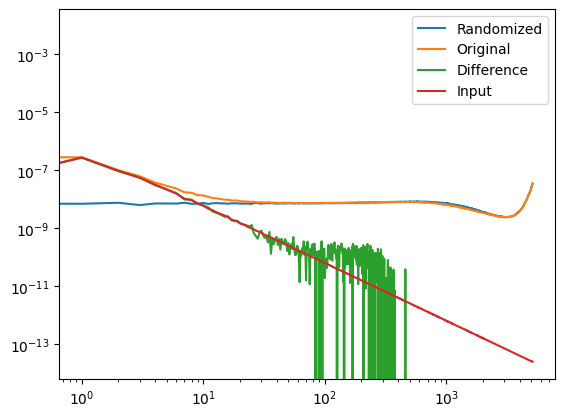

In [52]:
plt.loglog(alpha_qe_randomized, label = "Randomized")
plt.loglog(alpha_qe, label = "Original")
plt.loglog(alpha_qe-alpha_qe_randomized, label = "Difference")
#plt.loglog(alpha_qe_single-alpha_qe_single_randomized, label = "Difference Single")
plt.plot(alpha[0], label = "Input")
plt.legend()

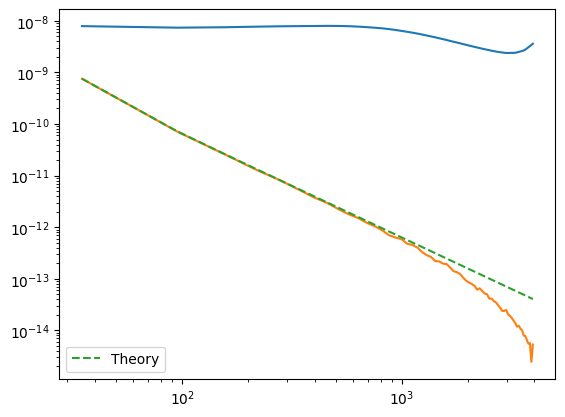

In [54]:
plt.loglog(*bin(alpha_qe))
plt.plot(*bin(-alpha_qe_cross))
plt.plot(*bin(alpha[0]), ls = "--", label = "Theory")
plt.legend()

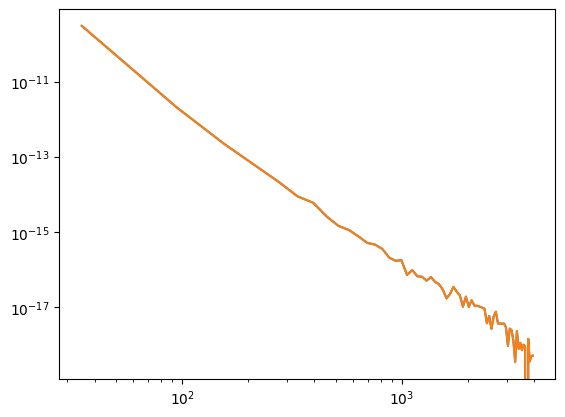

In [12]:
plt.loglog(*bin(-alpha_it_cross_single))
plt.loglog(*bin(-alpha_it_cross_single_randomized))

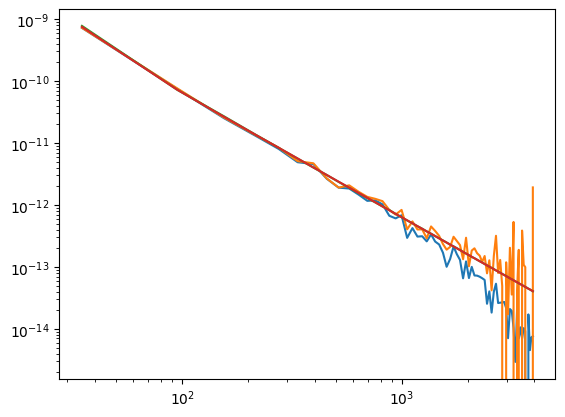

In [ ]:
plt.plot(*bin(-alpha_qe_cross_single))
plt.loglog(*bin(-alpha_it_cross_single/WF))

plt.plot(*bin(alpha_single))

plt.plot(*bin(alpha))